In [1]:
#Libraries to load and Finetune the Model
import tensorflow as tf

In [2]:
#Load the old dataset of Fashion-mnist    # Because i dont have new data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
#normalize this data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
#reshape the data into (6000,28,28) into the (6000,28,28,1) add information of colour channel
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [30]:
#load the old Model
old_model = tf.keras.models.load_model('E:/tensorflow/image_classification_model/model.keras')

In [23]:
prediction = old_model.predict(X_train[1].reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [24]:
prediction.argmax()

np.int64(5)

In [6]:
# architechere of old model
old_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,952 (54.50 KB)

 Trainable params: 4,650 (18.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,302 (36.34 KB)

In [ ]:
# # freeze the old model layers that it cant again train
# for layers in old_model.layers:
#     layers.trainable = False

In [ ]:
# old_model.summary() # know after freezing the old model it cant give trainable perameters

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,952 (54.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,650 (18.16 KB)

 Optimizer params: 9,302 (36.34 KB)

In [ ]:
# last_cov_layer_old_model = old_model.layers[6].output

In [ ]:
# #build the Model new trainable
# new_model = tf.keras.models.Sequential([
#     old_model,
#     tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'),
#     tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])

# # Note Conv2D expects data in 4d like image height, width, channel but our model ends in Dense layer which is None, 10 flatten layer thats why error

ValueError: Input 0 of layer "conv2d_18" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 10)

In [141]:
# When we Finetune a Model then we need to use keras Model not Sequential Because Sequential is used for add layerrs one by one build from scratch it cant able to rake some layers from the middle
from keras import Model

In [ ]:
# # taking from the 6th layer of old model Because it is the last layer before flatten Conv2D layer of 4d which Conv2D expects
# last_conv_output = old_model.layers[6].output


# # add new layers on the top of that model
# new_output = tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu')
# new_output = tf.keras.layers.MaxPooling2D(pool_size = (2,2))
# new_output = tf.keras.layers.Flatten()
# new_output = tf.keras.layers.Dense(10, activation = 'softmax')


# # make a new_model
# new_model = tf.keras.Model(inputs = old_model.input, outputs = new_output)


# # Note there are also problem in this architechere we cant add previos progress of the model to the next layers


AttributeError: The layer sequential_3 has never been called and thus has no defined input.

In [ ]:
# # Freeze the old model layers
# for layers in old_model.layers[:7]:
#     layers.trainable = False

In [ ]:
# # defines the input shape of the model of the old model which input it can expects like the h,w of images data
# input_tensors = tf.keras.layers.Input(shape = (28,28,1))


# x = old_model(input_tensors)
# # Take the first 6 layers of the old model 
# featured_model = tf.keras.Model(inputs = input_tensors, outputs = old_model.layers[6].output)


# # Freeze the old model layers
# for layers in old_model.layers[:7]:
#     layers.trainable = False


# # start buildindg the model from the 6th layer of model
# x = tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu')(featured_model) # this keep progress of old model layers in the new layer
# # x = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x) # using this pooling layer again can kill the information in my model because conv2d layer and the pooling layer also shrinks it to (1,1,10) if its more shrink or means use pooling layer again it can finish all the information skip pooling layer  # keep the progress of old layers
# x = tf.keras.layers.Flatten()(x) # keep the old progress
# x = tf.keras.layers.Dense(10, activation = 'softmax')(x)# progress of all layers  # Note im using the sigmoid activation function in my previous model which is not ideal for multiclassification but know im using the softmax because my old model starts from 6th layer which is the flatten layer so sigmoid function and layers after 6th are not use in my new model


# # Note here is the problem coming in this model of 2 inputs because one input is from the old model layers and the one input is from the new_model layers so to fix this defines the Input shape instead of using the old_model in Model inputs


# # new_model = tf.keras.Model(inputs = old_model.input, outputs = x) # in this line we need to define from which model need to take the input and which modlel can used to generate the output




TypeError: 'KerasTensor' object is not callable

In [ ]:
# new_model = tf.keras.Model(inputs = featured_model, outputs = x)

In [ ]:
# new_model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_78CLONE            │ (None, 3, 3, 10)       │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,020 (3.98 KB)

 Trainable params: 1,020 (3.98 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # Here is the more clean way to Finetune the old model

# # take the Model from keras and take the input and the ouput from the old model from which layers we want
# old_model_layers = tf.keras.Model(inputs = old_model.input, outputs = old_model.layers[6].output)

# # Freeze the taking layers or we say progress of the old model that it cant train while Finetunning
# for layer in old_model_layers.layers:
#     layer.trainable = False


#  # start building the new layers which can add on old model 
# x = tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu')(old_model_layers.output)# keep the progress of old model and take just their output # output is because their is the point old model layoffs its results # if we take input that means we take the old model from the first layer which cause 2 inputs
# x = tf.keras.layers.Flatten()(x) # keep the progress of old layers output
# x = tf.keras.layers.Dense(10, activation = 'softmax')(x)# keep the old layers output progrss and change the activation function to sigmoid to softmax in new_layers for multiclassificaation


# new_model = tf.keras.Model(inputs = old_model.input, outputs = x)


AttributeError: The layer sequential_3 has never been called and thus has no defined input.

In [ ]:
# new_model.summary()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 26, 26,    │        100 │ input_layer_5[0]… │
│                     │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 24, 24,    │        910 │ conv2d_15[6][0]   │
│                     │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 12, 12,    │          0 │ conv2d_16[5][0]   │
│ (MaxPooling2D)      │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 10, 10,    │        910 │ max_pooling2d_6[… │
│                     │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 8, 8, 10)  │        910 │ conv2d_17[3][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 6, 6, 10)  │        910 │ conv2d_18[2][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 3, 3, 10)  │          0 │ conv2d_19[1][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 1, 1, 10)  │        910 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_26          │ (None, 10)        │          0 │ conv2d_39[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 10)        │        110 │ flatten_26[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,760 (18.59 KB)

 Trainable params: 1,020 (3.98 KB)

 Non-trainable params: 3,740 (14.61 KB)

In [ ]:
# # set the model optimizer how the model update their weight and reduce error and which metrices we initialize the model results
# new_model.compile(optimizer = 'adam', loss = 'sparse_multiclass_crossentropy_', metrics = ['accuracy'])

In [ ]:
# X_train_reshaped = tf.reshape(X_train, (-1, 3, 3, 10))  # Reshape to (None, 3, 3, 10)

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 47040000 values, but the requested shape requires a multiple of 90 [Op:Reshape]

In [ ]:
# start finetune the new model layers
# new_model.fit(X_train, y_train, epochs = 20, verbose = 1) 

Epoch 1/20


ValueError: Input 0 of layer "functional_18" is incompatible with the layer: expected shape=(None, 3, 3, 10), found shape=(32, 28, 28)

In [ ]:
# X_train.shape
# # X_test.shape

(60000, 28, 28, 1)

In [ ]:
# print(len(functional_old_model.layers))
# for i, layer in enumerate(functional_old_model.layers):
#     print(f"{i}: {layer.name} ({layer.__class__.__name__})")

In [ ]:
import tensorflow as tf

# # 1. Load the old model (Sequential or Functional)
# old_model = tf.keras.models.load_model('image_classification_model/model.keras')

# # 2. Define a new input tensor
# input_tensor = tf.keras.Input(shape=(28, 28, 1))

# # 3. Pass the input_tensor through the old model
# x = old_model(input_tensor)  # ✅ This builds the model with functional API

# # 4. Create a functional model from old_model
# functional_old_model = tf.keras.Model(inputs=input_tensor, outputs=x)

# # 5. Get the output of the 6th layer (layer index 6)
# intermediate_output = seq_model.layers[6].output

# # 6. Freeze layers up to 6
# for layer in functional_old_model.layers[:7]:
#     layer.trainable = False

# # 7. Add new layers on top of intermediate output
# x = tf.keras.layers.Conv2D(10, (3, 3), activation='relu')(intermediate_output)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(10, activation='softmax')(x)

# # 8. Create final model
# new_model = tf.keras.Model(inputs=functional_old_model.input, outputs=x)

# # 9. Compile
# new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # 10. Fit
# new_model.fit(X_train, y_train, epochs=10, validation_split=0.2)



# print(len(functional_old_model.layers))
# for i, layer in enumerate(functional_old_model.layers):
    print(f"{i}: {layer.name} ({layer.__class__.__name__})")

IndexError: list index out of range

In [ ]:

# print(len(functional_old_model.layers))
# for i, layer in enumerate(functional_old_model.layers):
#     print(f"{i}: {layer.name} ({layer.__class__.__name__})")

2
0: input_layer_7 (InputLayer)
1: sequential_3 (Sequential)


In [ ]:
# # 1. Input layer
# input_tensor = tf.keras.Input(shape=(28, 28, 1))

# # 2. Call old Sequential model
# x = old_model(input_tensor)

# # 3. Build functional model
# functional_old_model = tf.keras.Model(inputs=input_tensor, outputs=x)

# # 4. Get layer 6 from inside old_model (it's a Sequential)
# seq_model = old_model  # This is your Sequential model
# intermediate_output = seq_model.layers[6].output  # Get output from 6th layer

# # 5. Add new layers
# x = tf.keras.layers.Conv2D(10, (3, 3), activation='relu')(intermediate_output)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(10, activation='softmax')(x)

# # 6. Create final model
# new_model = tf.keras.Model(inputs=input_tensor, outputs=x)


In [103]:
# 9. Compile
# new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # 10. Fit
# new_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

In [ ]:
import tensorflow as tf

# 1. Load the model
old_model = tf.keras.models.load_model('image_classification_model/model.keras') # load the model from the system which can be finetune

# 2. Define input again
input_tensor = tf.keras.Input(shape=(28, 28, 1)) #is can tell that how old model expects the data  

# 3. Pass input through old model
x = old_model(input_tensor) # pass the input tensors to the old model that it can acknoledged the input shape 

# 4. Create functional wrapper of the old model # in short it gives us a model from the old model that we can edit, freeze layers, finetune means add new layers
functional_old_model = tf.keras.Model(inputs=input_tensor, outputs=x) # it can start the old model # it provides the input shapes that model can know what kind of data is comming in , and the old model runs on this input old model is set in variable x and know the input shape # in short it can pass the data of model expected shape and pass this data to the old loaded model for works and give output # it can gives the old model that we can edit, finetune, or freeze their layers means it gives us a instance of the old model

# 5. Access internal Sequential model
seq_model = functional_old_model.get_layer("sequential_3")

# 6. Pass input through internal layers manually to get output at 6th layer
x = input_tensor
for i in range(7):  # Up to layer 6 (0-based index)
    x = seq_model.layers[i](x)

# 7. Freeze layers
for i in range(7):
    seq_model.layers[i].trainable = False

# 8. Add new layers
x = tf.keras.layers.Conv2D(10, (3,3), activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# 9. Final model
new_model = tf.keras.Model(inputs=input_tensor, outputs=x)

# 10. Compile
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 11. Train
new_model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1218 - loss: 9.4237 - val_accuracy: 0.1523 - val_loss: 2.2913
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1538 - loss: 2.2064 - val_accuracy: 0.1928 - val_loss: 2.1227
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2381 - loss: 2.0108 - val_accuracy: 0.3523 - val_loss: 1.6463
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3714 - loss: 1.5877 - val_accuracy: 0.4350 - val_loss: 1.4529
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4262 - loss: 1.4446 - val_accuracy: 0.4333 - val_loss: 1.4384
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4363 - loss: 1.3979 - val_accuracy: 0.4380 - val_loss: 1.3983
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4324 - loss: 1.3919 - val_accuracy: 0.4104 - val_loss: 1.3881
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4337 - loss:

In [55]:
x = input_tensor
for i in range(7):  # Up to layer 6 (0-based index)
    x = seq_model.layers[i](x)
    print(x)

<KerasTensor shape=(None, 26, 26, 10), dtype=float32, sparse=False, name=keras_tensor_307>
<KerasTensor shape=(None, 24, 24, 10), dtype=float32, sparse=False, name=keras_tensor_308>
<KerasTensor shape=(None, 12, 12, 10), dtype=float32, sparse=False, name=keras_tensor_309>
<KerasTensor shape=(None, 10, 10, 10), dtype=float32, sparse=False, name=keras_tensor_310>
<KerasTensor shape=(None, 8, 8, 10), dtype=float32, sparse=False, name=keras_tensor_311>
<KerasTensor shape=(None, 6, 6, 10), dtype=float32, sparse=False, name=keras_tensor_312>
<KerasTensor shape=(None, 3, 3, 10), dtype=float32, sparse=False, name=keras_tensor_313>


In [87]:
import tensorflow as tf # library for building Neural Network

old_model = tf.keras.models.load_model('E:/tensorflow/image_classification_model/model.keras') # load the old model from hard drive

In [88]:
# Define The input shape which old model build on or expects data in this shape
input_shape = tf.keras.Input(shape = (28,28,1))

In [89]:
# our model is sequential model by dfault wrap this model in keras.Model that we can work on this like edit , freeze layers, add new layers(Finetune)
x = old_model(input_shape) #gives the old model input shape that it can know for which type data it can works on
featured_model = tf.keras.Model(inputs = input_shape, outputs = x) # finally wrap the model, give the input shape of the model and sets the old model output that it could wrap the complete model work floow from input to output

In [90]:
# check what is the layer names of wrap old model
featured_model.layers

[<InputLayer name=input_layer_9, built=True>,
 <Sequential name=sequential_3, built=True>]

In [91]:
# know access the internal sequential model layers from wrap model
seq_model = featured_model.get_layer('sequential_3') # know extract the main sequential model layers from the wrap model like during buildind Conv2D , Pooling, Flatten, Dense layer 

In [92]:
# x = input_shape
# x = seq_model.layers
# print(x)

# for i in range(6):
#     print[i](x)

In [93]:
seq_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,952 (54.50 KB)

 Trainable params: 4,650 (18.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,302 (36.34 KB)

In [94]:
# know need to extract first 7 layer fom the wrap model which keep information from the image before flatten Layer because Conv2D layer expects shape is 4d
# also pass the input shape like (28,28,1) for each layer of the model which we can extract that it can know what kind of data is coming in and what their shape ready to this extract layers by passing them input shape
x = input_shape # (28,28,1) store in x
for i in range(7):# loop for 7 numbers in i
    x = seq_model.layers[i](x) # know each number is coming in i one by one that can gothrough each layer(7 layers of wrap model) and save with this i (x) which store the information of input data and store everthing in the x variable
    print(x)

<KerasTensor shape=(None, 26, 26, 10), dtype=float32, sparse=False, name=keras_tensor_392>
<KerasTensor shape=(None, 24, 24, 10), dtype=float32, sparse=False, name=keras_tensor_393>
<KerasTensor shape=(None, 12, 12, 10), dtype=float32, sparse=False, name=keras_tensor_394>
<KerasTensor shape=(None, 10, 10, 10), dtype=float32, sparse=False, name=keras_tensor_395>
<KerasTensor shape=(None, 8, 8, 10), dtype=float32, sparse=False, name=keras_tensor_396>
<KerasTensor shape=(None, 6, 6, 10), dtype=float32, sparse=False, name=keras_tensor_397>
<KerasTensor shape=(None, 3, 3, 10), dtype=float32, sparse=False, name=keras_tensor_398>


In [95]:
# know freeze this layers after extract this layers and provide them input shape
for i in range(7):
    seq_model.layers[i].trainable = False
    print(i)

    # Note it can loop and set False to all the 7 layers in the loop for training one by one 

0
1
2
3
4
5
6


In [96]:
# starts building the layers which can train and then inject between the old model layers
x = tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation='relu')(x) # taking the previous wrap model information which store in x their layers and they know input shape
x = tf.keras.layers.Flatten()(x) # previous variable that store old wrap model information and new layer output
x = tf.keras.layers.Dense(10, activation='softmax')(x)# last x that can take everything and store their progress in this output layer means to do that take (x) variable of previous line that can store the old wrap model inference with the current line output which goes to the next line through this variable (x)

In [97]:
# know wrap the new model layers which can also save the progress of previous model layers but we manually freeze the old model layers
finetune_model = tf.keras.Model(inputs = input_shape, outputs = x)

In [98]:
# compile the nodel how to update their weight and which goes to decrease during training(how to reduce model loss) and which metrics to measure the accuracy of the model
new_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [100]:
new_model.fit(X_train, y_train, epochs=10, verbose = 1, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5116 - loss: 1.2820 - val_accuracy: 0.4807 - val_loss: 1.3535
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5100 - loss: 1.2815 - val_accuracy: 0.5161 - val_loss: 1.2894
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5153 - loss: 1.2754 - val_accuracy: 0.5152 - val_loss: 1.2849
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5124 - loss: 1.2723 - val_accuracy: 0.5298 - val_loss: 1.2860
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5137 - loss: 1.2734 - val_accuracy: 0.5028 - val_loss: 1.2967
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5129 - loss: 1.2788 - val_accuracy: 0.5032 - val_loss: 1.2968
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5212 - loss: 1.2685 - val_accuracy: 0.5067 - val_loss: 1.2902
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5197 - loss: 1.2665 - 

In [101]:
# make the directory that can store the model

import os
os.makedirs('Finetune_CNN_Model', exist_ok=True)


In [102]:
# save the Fine Tune in the Hard Drive
new_model.save('Finetune_CNN_Model/model.keras')

In [105]:
# load the save finetune model from the system
model = tf.keras.models.load_model('E:/tensorflow/Finetune_CNN_Model/model.keras')

In [107]:
# check the results of this Finetune model
def model_predictions(image):
    predictions = model.predict(image.reshape(1,28,28,1))
    max_number = predictions.argmax()
    return max_number

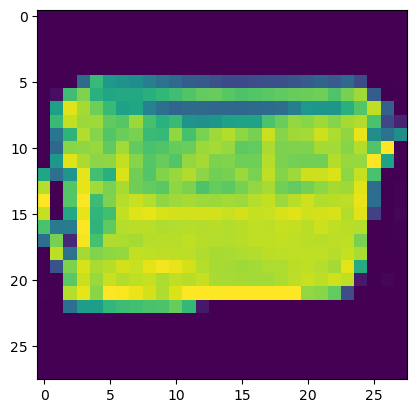

In [110]:
#import matplotlib pyplot to check which image is this
import matplotlib.pyplot as plt
plt.imshow(X_test[56])

In [109]:
p = model_predictions(X_test[56])
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
8


In [111]:
t = model_predictions(X_test[56])
if t == 0:
    print("T-shirt/top")
if t == 1:
    print("Trouser")
if t == 2:
    print("Pullover")
if t == 3:
    print(" Dress")
if t == 4:
    print("Coat")
if t == 5:
    print("Sandal")
if t == 6:
    print("Shirt")
if t == 7:
    print(" Sneaker")
if t == 8:
    print("Bag")
if t == 9:
    print("Ankle boot")

print(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Bag
8
